# Лабораторная работа № 2. Методы классификации данных

## Выполнил: Мустафа Йылдирим

## Группа: 18-ИВТ-2

## Вариант 11


## 	Набор данных: 3 (zoo)
##  Классификаторы:
### 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
### 3 – логический классификатор (бинарное решающее дерево);


### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

#### animal_name - уникально для каждого экземпляра
#### hair - волосы
#### eggs - яйца
#### milk - молоко
#### airborne - летающий
#### aquatic - водный
#### predator - хищник
#### toothed - имеет зубы
#### backbone - позвоночный
#### breathes - дышащий
#### venomous - ядовитый
#### fins - имеет ребра
#### legs - ноги
#### tail - хвост
#### domestic - домашнее
#### catsize - семейство кошачьих

### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.cross_validation import train_test_split


C:\Users\Михаил\OneDrive\Рабочий стол\Юпитер\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
df = pd.read_csv("zoo.csv")

In [26]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
1,antelope,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0
2,bass,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5
3,bear,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0
4,boar,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0


In [5]:
print("До удаления дубликатов ", df.shape)

До удаления дубликатов  (101, 18)


In [6]:
print("После удаления дубликатов ", df.drop_duplicates().shape)

После удаления дубликатов  (101, 18)


### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

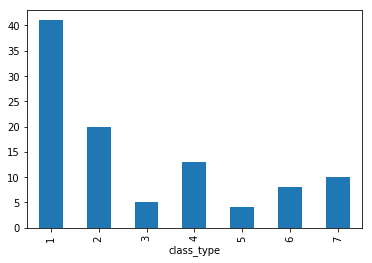

In [10]:
df.groupby(["class_type"])["class_type"].count().plot(kind='bar')

###  Дисбаланс классов выражен неявно, лучше использовать ROC-кривую

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

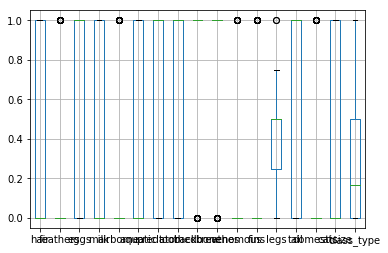

In [20]:
numerical = [c for c in df.columns if df[c].dtype.name != 'object']
df.boxplot()

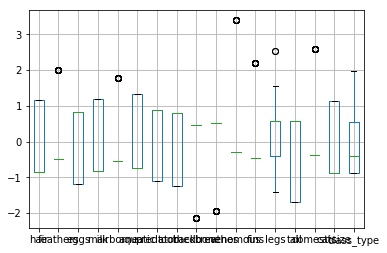

In [21]:
numerical = df[['hair', 'feathers', 'eggs', 'milk', 'airborne',
        'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']] 
numerical = (numerical - numerical.mean()) / numerical.std() 
numerical.boxplot()

### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pd.Series(label_encoder.fit_transform(df['animal_name']))

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10
11     11
12     12
13     13
14     14
15     15
16     16
17     17
18     18
19     19
20     20
21     21
22     22
23     23
24     24
25     25
26     25
27     26
28     27
29     28
       ..
71     70
72     71
73     72
74     73
75     74
76     75
77     76
78     77
79     78
80     79
81     80
82     81
83     82
84     83
85     84
86     85
87     86
88     87
89     88
90     89
91     90
92     91
93     92
94     93
95     94
96     95
97     96
98     97
99     98
100    99
Length: 101, dtype: int64

### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

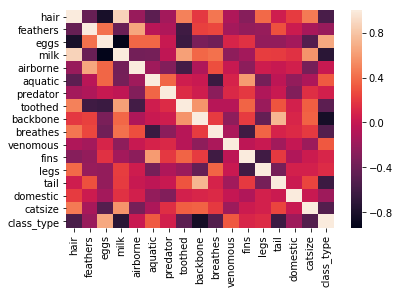

In [24]:
sns.heatmap(df.corr())

#### Признаки коррелируют равномерно

### 7.	Заполните пропущенные значения в данных;

In [28]:
df.count()

animal_name    101
hair           101
feathers       101
eggs           101
milk           101
airborne       101
aquatic        101
predator       101
toothed        101
backbone       101
breathes       101
venomous       101
fins           101
legs           101
tail           101
domestic       101
catsize        101
class_type     101
dtype: int64

#### Пропуски данных отсутствуют

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

#### 1. Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

In [33]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

In [36]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(2,3,10),
          'weights': ['uniform', 'distance']}
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)
y_score = rnc_grid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Best score: {}'.format(rnc_grid.best_score_))

Best score: 0.95


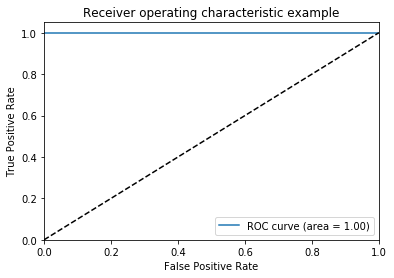

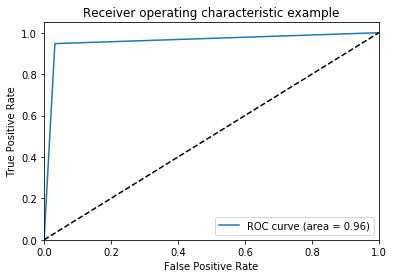

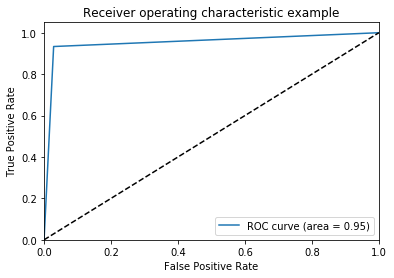

In [37]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

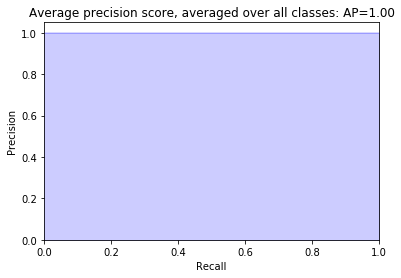

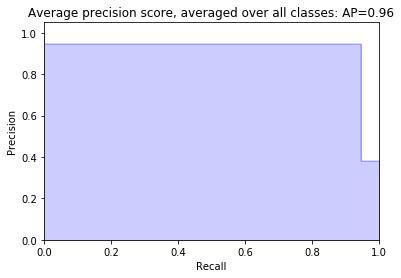

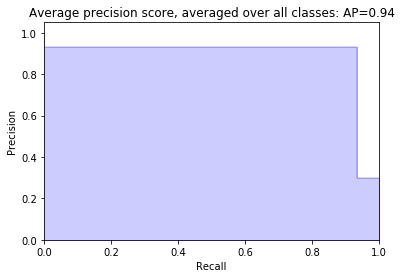

In [47]:
recall = dict()
precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, averaged over all classes: AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

#### 2. логический классификатор (бинарное решающее дерево);

In [52]:
from sklearn.tree import DecisionTreeClassifier


dts = DecisionTreeClassifier()
params = {'max_depth': list(range(1,22))}
dtc_grid = GridSearchCV(dts, params)
dtc_grid.fit(X_train, y_train)
best_depth = dtc_grid.best_estimator_.max_depth
best_features = dtc_grid.best_estimator_.max_features
best_score = dtc_grid.best_score_
print('best score: ', best_score)

best score:  0.97


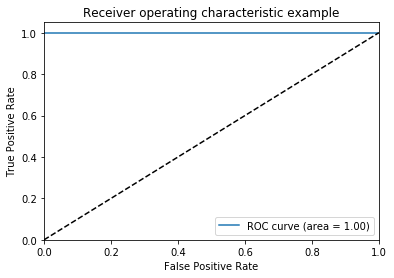

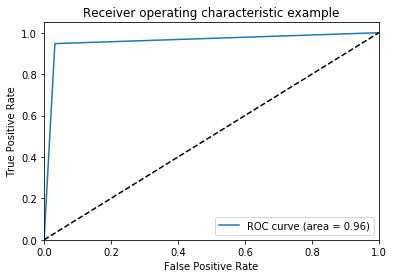

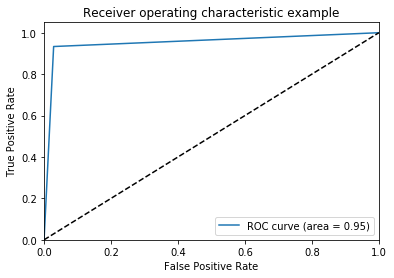

In [53]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

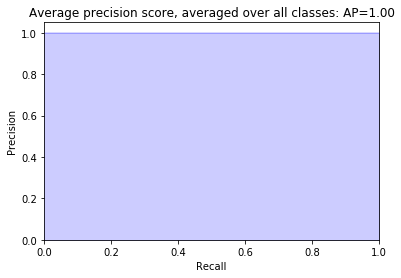

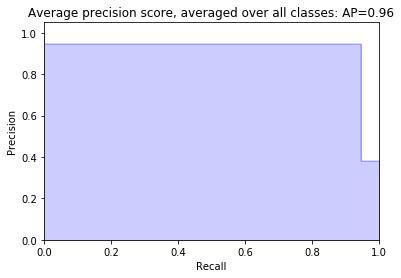

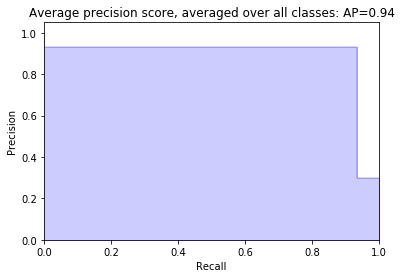

In [50]:
recall = dict()
precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, averaged over all classes: AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()